In [39]:
from utilities import clean_data, missing_values, derivatives_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df, _, _, _, _, _,_ = clean_data()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298040 entries, 0 to 298039
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period_end_date                         298040 non-null  datetime64[ns]
 1   business_entity_doing_business_as_name  298040 non-null  object        
 2   followers                               236313 non-null  float64       
 3   pictures                                294176 non-null  float64       
 4   videos                                  288438 non-null  float64       
 5   comments                                293958 non-null  float64       
 6   likes                                   294288 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 15.9+ MB


In [21]:
df_cleaned = missing_values(df)
df_cleaned.info()

Number of rows with at least one NaN before cleaning: 65868
Number of rows with at least one NaN after dropping series of Nan's at beginning of businesses: 4378
Total NaN entries: 14027

 Remaining number of rows with Nan that are not at beginning or end:
Number of rows with 4 NaNs: 3214
Number of rows with 3 NaNs: 0
Number of rows with 2 NaNs: 7
Number of rows with 1 NaNs: 924
Total remaining rows with at least one Nan:  4145
Total entries being an Nan:  13794
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298040 entries, 0 to 298039
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period_end_date                         298040 non-null  datetime64[ns]
 1   business_entity_doing_business_as_name  298040 non-null  object        
 2   followers                               236313 non-null  float64       
 3   pictures                          

In [22]:
df_cleaned.dropna(inplace=True)

In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232172 entries, 0 to 236549
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period_end_date                         232172 non-null  datetime64[ns]
 1   business_entity_doing_business_as_name  232172 non-null  object        
 2   followers                               232172 non-null  float64       
 3   pictures                                232172 non-null  float64       
 4   videos                                  232172 non-null  float64       
 5   comments                                232172 non-null  float64       
 6   likes                                   232172 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 14.2+ MB


In [32]:
df_change_rate, df_curvature = derivatives_data(df_cleaned)

In [34]:
df_change_rate.fillna(0, inplace=True)
df_change_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232172 entries, 0 to 236549
Data columns (total 7 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   period_end_date                         232172 non-null  datetime64[ns]
 1   business_entity_doing_business_as_name  232172 non-null  object        
 2   change in pictures                      232172 non-null  float64       
 3   change in videos                        232172 non-null  float64       
 4   change in comments                      232172 non-null  float64       
 5   change in likes                         232172 non-null  float64       
 6   change in followers                     232172 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 14.2+ MB


In [31]:
df_change_rate.describe()

,period_end_date,change in pictures,change in videos,change in comments,change in likes,change in followers
count,232172,232172.000000,232172.000000,2.321720e+05,2.321720e+05,2.321720e+05
mean,2020-04-14 13:19:08.851713280,125.077361,27.999892,1.117173e+04,7.172399e+05,1.817647e+01
min,2015-01-03 00:00:00,0.000000,0.000000,0.000000e+00,0.000000e+00,-4.292336e+08
25%,2018-09-15 00:00:00,17.000000,2.000000,3.610000e+02,1.449800e+04,2.740000e+02
50%,2020-06-20 00:00:00,40.000000,7.000000,1.423000e+03,7.865850e+04,1.726000e+03
75%,2022-02-12 00:00:00,105.000000,21.000000,5.556250e+03,3.652775e+05,8.157250e+03
max,2023-09-16 00:00:00,10498.000000,1910.000000,3.179575e+06,1.206897e+08,3.772801e+07
std,NaN,280.489100,78.099527,5.881802e+04,2.629938e+06,1.093285e+06


Text(0, 0.5, 'change in followers')

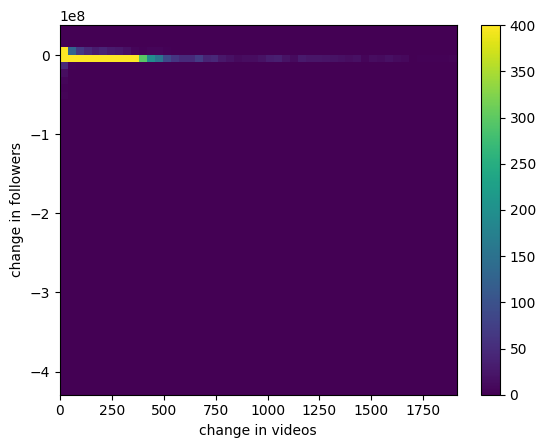

In [36]:
plt.hist2d(df_change_rate['change in videos'], df_change_rate['change in followers'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('change in videos')
plt.ylabel('change in followers')

In [37]:
date = pd.to_datetime(df_change_rate.pop('period_end_date'), format='%Y-%m-%d')

In [38]:
date

0        2017-09-23
1        2017-09-30
2        2017-10-07
3        2017-10-14
4        2017-10-21
            ...    
236545   2023-08-19
236546   2023-08-26
236547   2023-09-02
236548   2023-09-09
236549   2023-09-16
Name: period_end_date, Length: 232172, dtype: datetime64[ns]

In [76]:
# comput the sin/cosine of the month, and year
df_change_rate['month_sin'] = date.dt.month.apply(lambda x: np.sin(2 * np.pi * x / 12))
df_change_rate['month_cos'] = date.dt.month.apply(lambda x: np.cos(2 * np.pi * x / 12))
df_change_rate['year_sin'] = date.dt.isocalendar().week.apply(lambda x: np.sin(2 * np.pi * x / 52))
df_change_rate['year_cos'] = date.dt.isocalendar().week.apply(lambda x: np.cos(2 * np.pi * x / 52))

# # Compute week of the year
# df['week_of_year'] = df['date_column'].dt.isocalendar().week

# # Compute month of the year
# df['month_of_year'] = df['date_column'].dt.month

# # Compute year sine and cosine features
# df['year_sin'] = np.sin(2 * np.pi * df['week_of_year'] / 52)
# df['year_cos'] = np.cos(2 * np.pi * df['week_of_year'] / 52)

# # Compute month sine and cosine features
# df['month_sin'] = np.sin(2 * np.pi * df['month_of_year'] / 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month_of_year'] / 12)


Text(0.5, 1.0, 'Time of day signal')

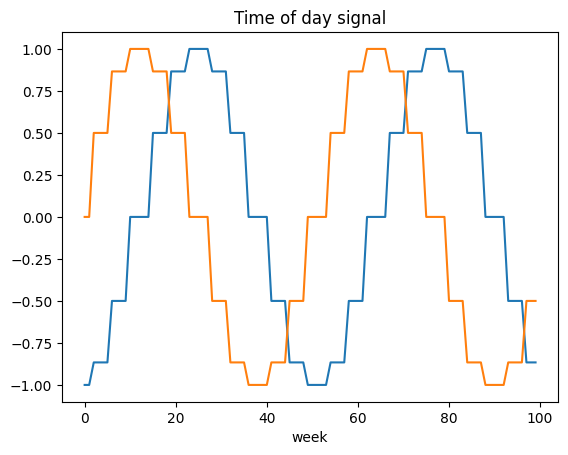

In [77]:
num_data = 100
plt.plot(np.array(df_change_rate['month_sin'])[:num_data])
plt.plot(np.array(df_change_rate['month_cos'])[:num_data])
plt.xlabel('week')
plt.title('Time of day signal')

In [48]:
import tensorflow as tf

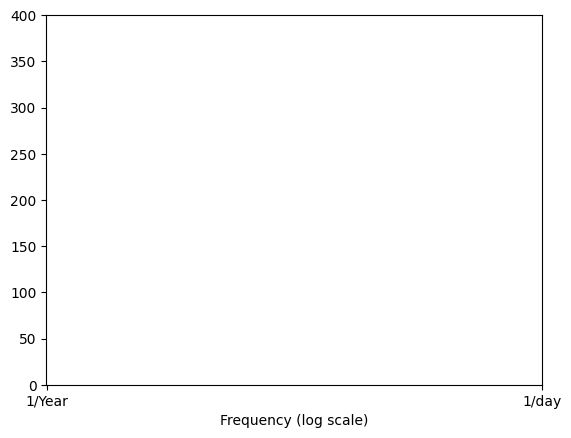

In [78]:
fft = tf.signal.rfft(df_change_rate['change in followers'])
f_per_dataset = np.arange(0, len(fft))

n_samples_w = len(df_change_rate['change in followers'])
weeks_per_year = 365.2524/7
years_per_dataset = n_samples_w/(weeks_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.ylim(0, 400)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### Split the data without random sampling

In [79]:
df_for_model = df_change_rate.copy()
df_for_model.columns

Index(['business_entity_doing_business_as_name', 'change in pictures',
       'change in videos', 'change in comments', 'change in likes',
       'change in followers', 'month_sin', 'month_cos', 'year_sin',
       'year_cos'],
      dtype='object')

In [80]:
# encode the business_entity_doing_business_as_name column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_for_model['business_entity_doing_business_as_name'] = le.fit_transform(df_for_model['business_entity_doing_business_as_name'])
df_for_model.head()

,business_entity_doing_business_as_name,change in pictures,change in videos,change in comments,change in likes,change in followers,month_sin,month_cos,year_sin,year_cos
0,0,75.0,10.0,196.0,18853.0,0.0,-1.000000,-1.836970e-16,-0.992709,-1.205367e-01
1,0,65.0,13.0,187.0,17755.0,949.0,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16
2,0,55.0,12.0,144.0,15733.0,918.0,-0.866025,5.000000e-01,-0.992709,1.205367e-01
3,0,46.0,13.0,118.0,14802.0,1027.0,-0.866025,5.000000e-01,-0.970942,2.393157e-01
4,0,46.0,10.0,119.0,14450.0,391.0,-0.866025,5.000000e-01,-0.935016,3.546049e-01


In [72]:
df[df["business_entity_doing_business_as_name"]=="24S"]["period_end_date"]

0     2017-05-06
1     2017-05-13
2     2017-05-20
3     2017-05-27
4     2017-06-03
         ...    
328   2023-08-19
329   2023-08-26
330   2023-09-02
331   2023-09-09
332   2023-09-16
Name: period_end_date, Length: 333, dtype: datetime64[ns]

In [86]:
df_for_model_one_brand = df_for_model[df_for_model['business_entity_doing_business_as_name'] == 0].drop(columns=['business_entity_doing_business_as_name'])

In [87]:
column_indices = {name: i for i, name in enumerate(df_for_model_one_brand.columns)}
n = len(df_for_model_one_brand)
train_size = 0.7
val_size = 0.2
test_size = 0.1
train_df = df_for_model_one_brand[0:int(n*train_size)]
val_df = df_for_model_one_brand[int(n*train_size):int(n*(train_size+val_size))]
test_df = df_for_model_one_brand[int(n*(train_size+val_size)):]
num_features = df_for_model_one_brand.shape[1]

In [88]:
### Normalize the data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [89]:
import seaborn as sns

/var/folders/yd/z6_kxvwj695fk45rl_9jd3k40000gn/T/ipykernel_86450/1626093367.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df_for_model_one_brand.keys(), rotation=90)


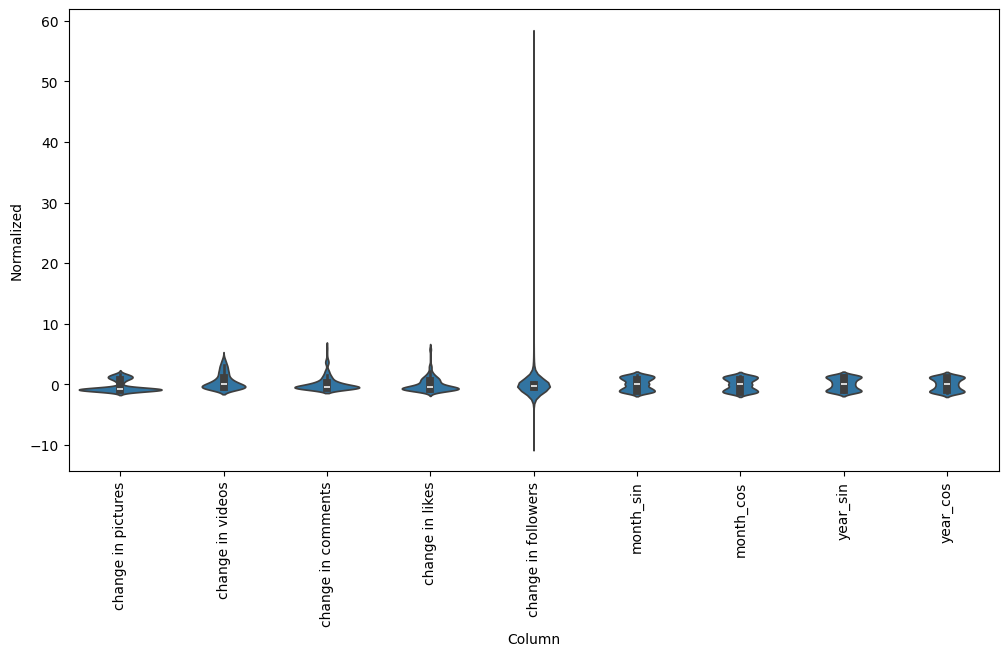

In [90]:
### plot the distribution of the data
df_std = (df_for_model_one_brand - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_for_model_one_brand.keys(), rotation=90)